In [45]:
# Getting x_down for a single band

A = 100
X = 465167.96928049624
Y = 28.73750934498821
P_O_UP = 1548.1050383543193
P_O_DOWN = 1532.623987970776
TOTAL_SHARES = 337320.3032931086
USER_SHARES = 104537.00375868677
DEAD_SHARES = 1e-15
SHARE = USER_SHARES / TOTAL_SHARES


def y0(p_o):
    # solve:
    # p_o * A * y0**2 - y0 * (p_oracle_up/p_o * (A-1) * x + p_o**2/p_oracle_up * A * y) - xy = 0
    b = 0
    # p_o_up * unsafe_sub(A, 1) * x / p_o + A * p_o**2 / p_o_up * y / 10**18
    if X != 0:
        b = P_O_UP * (A - 1) * X / p_o
    if Y != 0:
        b += A * p_o**2 / P_O_UP * Y
    if X > 0 and Y > 0:
        D = b**2 + ((4 * A) * p_o) * Y * X
        return (b + D**0.5) / (2 * A * p_o)
    else:
        return b / (A * p_o)


def f(p_o, y0):
    return A * y0 * p_o**2 / P_O_UP


def g(p_o, y0):
    return (A - 1) * y0 * P_O_UP / p_o


def inv(f, g):
    return (X + f) * (Y + g)


def x_down(p_o):
    _y0 = y0(p_o)
    _f = f(p_o, _y0)
    _g = g(p_o, _y0)
    _inv = inv(_f, _g)
    if p_o > P_O_UP:
        y_o = _inv / _f - _g
        return y_o * P_O_UP * ((A - 1) / A) ** 0.5
    elif p_o < P_O_DOWN:
        x_o = _inv / _g - _f
        return x_o
    else:
        y_o = A * _y0 * (p_o - P_O_DOWN) / p_o
        x_o = _inv / (_g + y_o) - _f
        return x_o + y_o * (P_O_DOWN * p_o) ** 0.5


def p(p_o):
    _y0 = y0(p_o)
    return (X + f(p_o, _y0)) / (Y + g(p_o, _y0))


p_o_prev = 1534.916364
p_o = 1592.348798235594
x_down(p_o) * SHARE

144333.27639979988

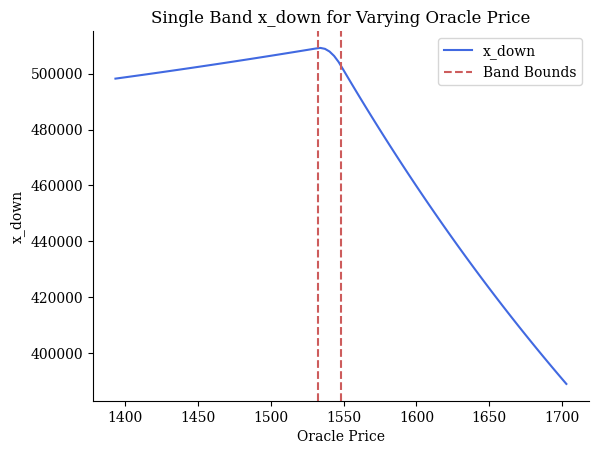

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 10})
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# plt.rcParams["axes.facecolor"] = "#f5f5f5"
plt.rcParams["grid.color"] = "white"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.linewidth"] = 2

x = np.linspace(P_O_UP * 0.9, P_O_UP * 1.1, 100)
y = [x_down(p) for p in x]

plt.plot(x, y, lw=1.5, color="royalblue", label="x_down")
plt.axvline(P_O_UP, lw=1.5, linestyle="--", color="indianred", label="Band Bounds")
plt.axvline(P_O_DOWN, lw=1.5, linestyle="--", color="indianred")
plt.legend()
plt.ylabel("x_down")
plt.xlabel("Oracle Price")
plt.title("Single Band x_down for Varying Oracle Price")
plt.savefig("../figs/manual/x_down.png")

In [21]:
x = 0
if x is None:
    print("fo")